# Задание 1
Вариант 2: В var2 представлена статистика по террористической угрозе в аэропортах за разные годы: год, количество различных видов оружия, обнаруженных сотрудниками, количество взрывов и ложных тревог.

In [81]:
import matplotlib.pyplot as plt
import seaborn as sb
import math
import numpy as np
import copy
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
import pandas_profiling
import scipy.stats

## Извлечем данные:

In [150]:
data = pd.read_csv("./var2.tsv", sep="\t")
data

,year,Screened,Totalweapons,Handguns,Longguns,Firearmarrests,Explosives,falseinfo
0,1977,508.8,2034,1730,64,810,5.0,44
1,1978,579.7,2058,1827,67,896,3.0,64
2,1979,592.5,2161,1962,55,1060,3.0,47
3,1980,585.0,2022,1878,36,1031,8.0,32
4,1981,598.5,2255,2124,44,1187,11.0,49
5,1982,630.2,2676,2559,57,1314,1.0,27
6,1983,709.1,2784,2634,67,1282,4.0,34
7,1984,775.6,2957,2766,100,1285,6.0,27
8,1985,992.9,2987,2823,90,1310,12.0,42
9,1986,1055.3,3241,2981,146,1415,11.0,89


In [151]:
years = data['year']



## Теперь рассмотрим графики ф. р. и некоторые числовые характеристики данных 
## Screened

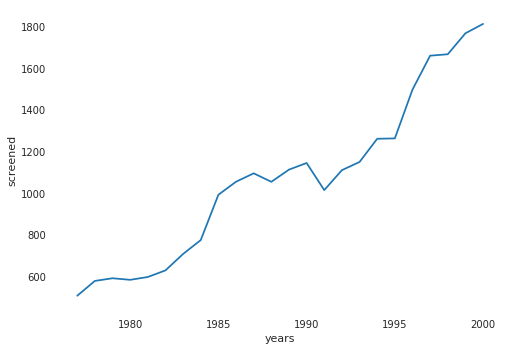

In [152]:
screened = data['Screened']
plt.gca().set(xlabel='years', ylabel='screened')
plt.plot(years, screened)

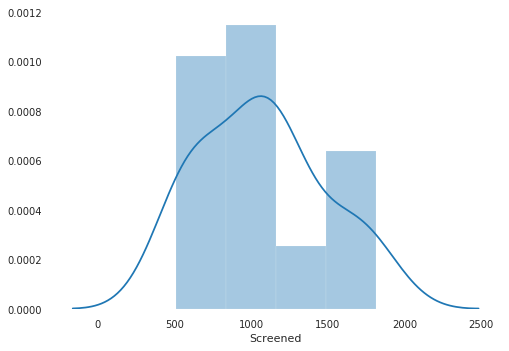

In [153]:
sb_plot = sb.distplot(screened)
fig = sb_plot.get_figure()

## Total weapons

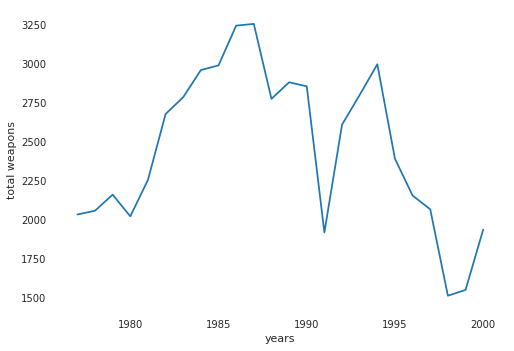

In [154]:
total = data['Totalweapons']
plt.gca().set(xlabel='years', ylabel='total weapons')
plt.plot(years, total)

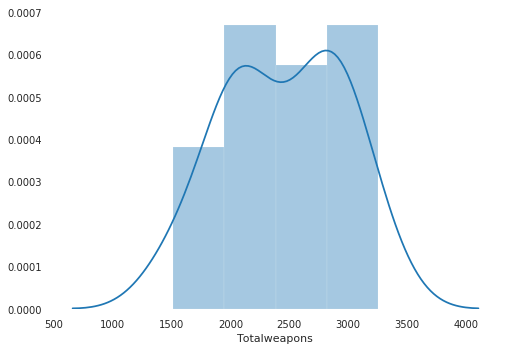

In [155]:
sb_plot = sb.distplot(total)
fig = sb_plot.get_figure()

## Handguns

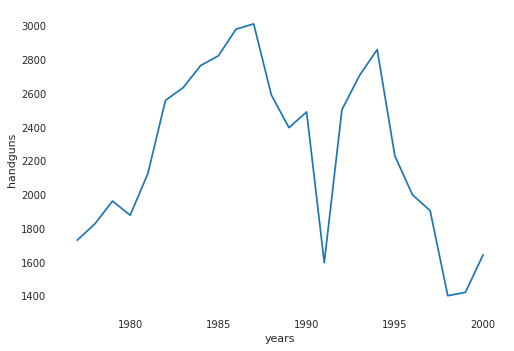

In [156]:
handguns = data['Handguns']
plt.gca().set(xlabel='years', ylabel='handguns')
plt.plot(years, handguns)

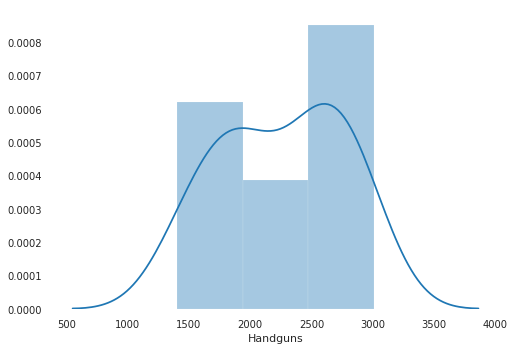

In [157]:
sb_plot = sb.distplot(handguns)
fig = sb_plot.get_figure()

## Longguns

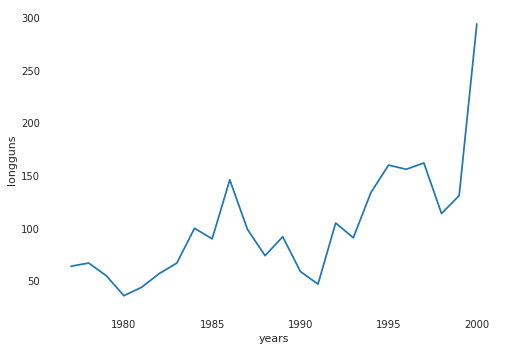

In [158]:
longguns = data['Longguns']
plt.gca().set(xlabel='years', ylabel='longguns')
plt.plot(years, longguns)

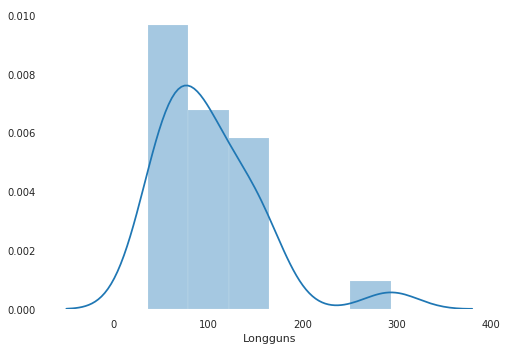

In [159]:
sb_plot = sb.distplot(longguns)
fig = sb_plot.get_figure()

## Firearmarrests

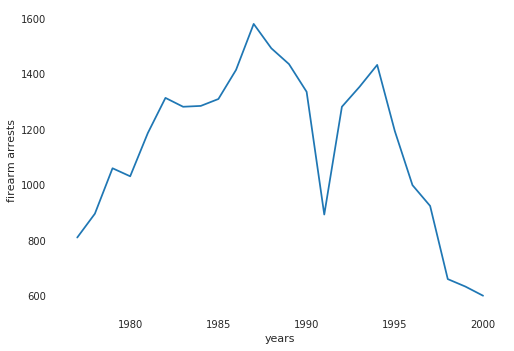

In [160]:
firearmarrests = data['Firearmarrests']
plt.gca().set(xlabel='years', ylabel='firearm arrests')
plt.plot(years, firearmarrests)

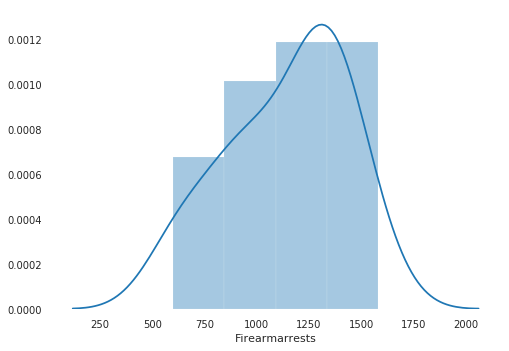

In [161]:
sb_plot = sb.distplot(firearmarrests)
fig = sb_plot.get_figure()

## Explosives

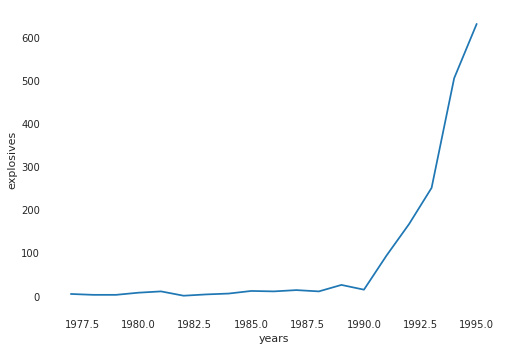

In [162]:
explosives = [data['Explosives'][i] for i in range(19)]
plt.gca().set(xlabel='years', ylabel='explosives')
plt.plot([years[i] for i in range(19)], explosives)

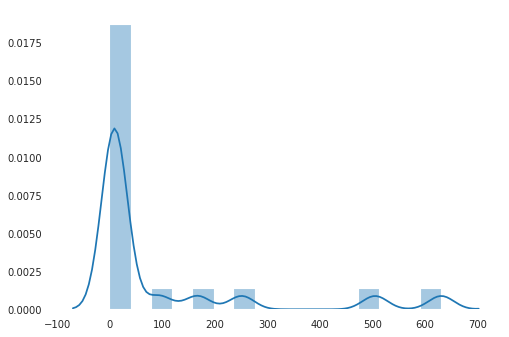

In [163]:
sb_plot = sb.distplot(explosives)
fig = sb_plot.get_figure()

## False info

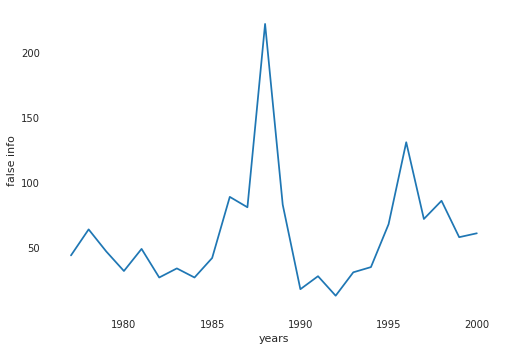

In [164]:
falseinfo = data['falseinfo']
plt.gca().set(xlabel='years', ylabel='false info')
plt.plot(years, falseinfo)

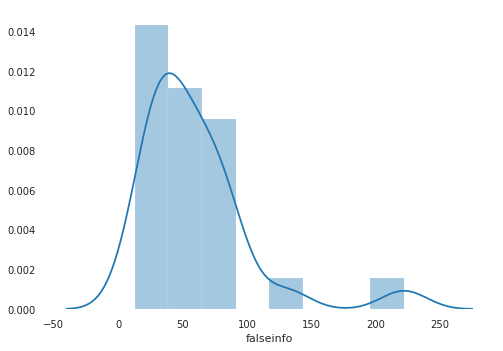

In [165]:
sb_plot = sb.distplot(falseinfo)
fig = sb_plot.get_figure()

## Посмотрим на числовые характеристики:

#### min

In [166]:
print(data.min())

year              1977.0
Screened           508.8
Totalweapons      1515.0
Handguns          1401.0
Longguns            36.0
Firearmarrests     600.0
Explosives           1.0
falseinfo           13.0
dtype: float64


#### max

In [167]:
print(data.max())

year              2000.0
Screened          1812.0
Totalweapons      3252.0
Handguns          3012.0
Longguns           294.0
Firearmarrests    1581.0
Explosives         631.0
falseinfo          222.0
dtype: float64


#### mean

In [168]:
print(data.mean())

year              1988.500000
Screened          1068.283333
Totalweapons      2452.791667
Handguns          2251.666667
Longguns           101.833333
Firearmarrests    1142.000000
Explosives          93.578947
falseinfo           60.083333
dtype: float64


#### median

In [169]:
print(data.median())

year              1988.50
Screened          1075.45
Totalweapons      2499.00
Handguns          2313.50
Longguns            91.50
Firearmarrests    1238.00
Explosives          11.00
falseinfo           48.00
dtype: float64


#### variance

In [170]:
print(data.var())

year                  50.000000
Screened          159687.546667
Totalweapons      259306.693841
Handguns          254989.884058
Longguns            3155.710145
Firearmarrests     81359.217391
Explosives         32682.923977
falseinfo           1955.297101
dtype: float64


#### std

In [171]:
print(data.std())

year                7.071068
Screened          399.609242
Totalweapons      509.221655
Handguns          504.965231
Longguns           56.175708
Firearmarrests    285.235372
Explosives        180.784192
falseinfo          44.218742
dtype: float64


#### kurtosis

In [172]:
print(data.kurt())

year             -1.200000
Screened         -0.774181
Totalweapons     -1.053170
Handguns         -1.266218
Longguns          4.839389
Firearmarrests   -0.801341
Explosives        4.669245
falseinfo         7.319643
dtype: float64


#### skewness

In [173]:
print(data.skew())

year              0.000000
Screened          0.368542
Totalweapons     -0.169025
Handguns         -0.156061
Longguns          1.802458
Firearmarrests   -0.514323
Explosives        2.318581
falseinfo         2.352504
dtype: float64


####  Выводы1:

1. Все характеристики общего числа оружия и короткоствольного оружия довольно близки. Очевидно, потому что доля короткоствольного среди всего оружия наибольшая по сравнению с другими видами оружия.
2. Есть основания полагать, что в значениях числа длинноствольного оружия, взрывов и ложных вызовов присутствуют выбросы, так как значение коэффициента эксцесса положительно. 
3. Также по графикам значений числа взрывов и ложных вызовов видно, что в конце они вместе резко возрастают (с поправкой на то, что за последние 6 лет число взрывов неизвестно). Кажется, что именно эти резко увеличивающиеся значения в основном влияют на эксцесс, и логично предположить, что увеличение числа взрывов может вызывать увеличение числа ложных вызовов, несмотря на то, что между ними нет корреляции (см. таблицу ниже)

### Посмотрим на связь между данными:

Посчитаем корреляцию и представим ее несколькими способами для удобства:

In [174]:
cor = data.corr()
cor

,year,Screened,Totalweapons,Handguns,Longguns,Firearmarrests,Explosives,falseinfo
year,1.000000,0.965992,-0.235815,-0.218229,0.715841,-0.274504,0.703858,0.184941
Screened,0.965992,1.000000,-0.268059,-0.261919,0.771044,-0.345323,0.598363,0.268263
Totalweapons,-0.235815,-0.268059,1.000000,0.982438,-0.121276,0.935671,0.038466,0.004448
Handguns,-0.218229,-0.261919,0.982438,1.000000,-0.125323,0.935496,0.105365,-0.004382
Longguns,0.715841,0.771044,-0.121276,-0.125323,1.000000,-0.317095,0.667366,0.194239
Firearmarrests,-0.274504,-0.345323,0.935671,0.935496,-0.317095,1.000000,0.114315,0.093473
Explosives,0.703858,0.598363,0.038466,0.105365,0.667366,0.114315,1.000000,-0.095888
falseinfo,0.184941,0.268263,0.004448,-0.004382,0.194239,0.093473,-0.095888,1.000000


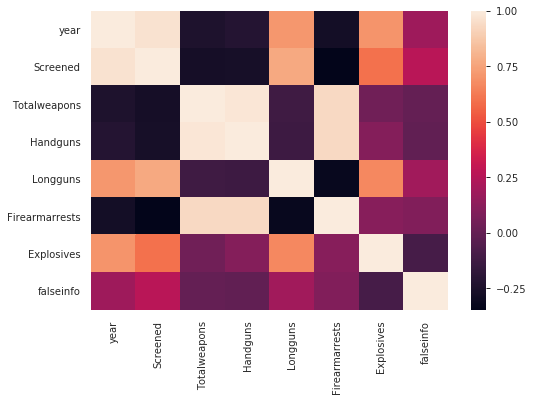

In [175]:
hm = sb.heatmap(cor)

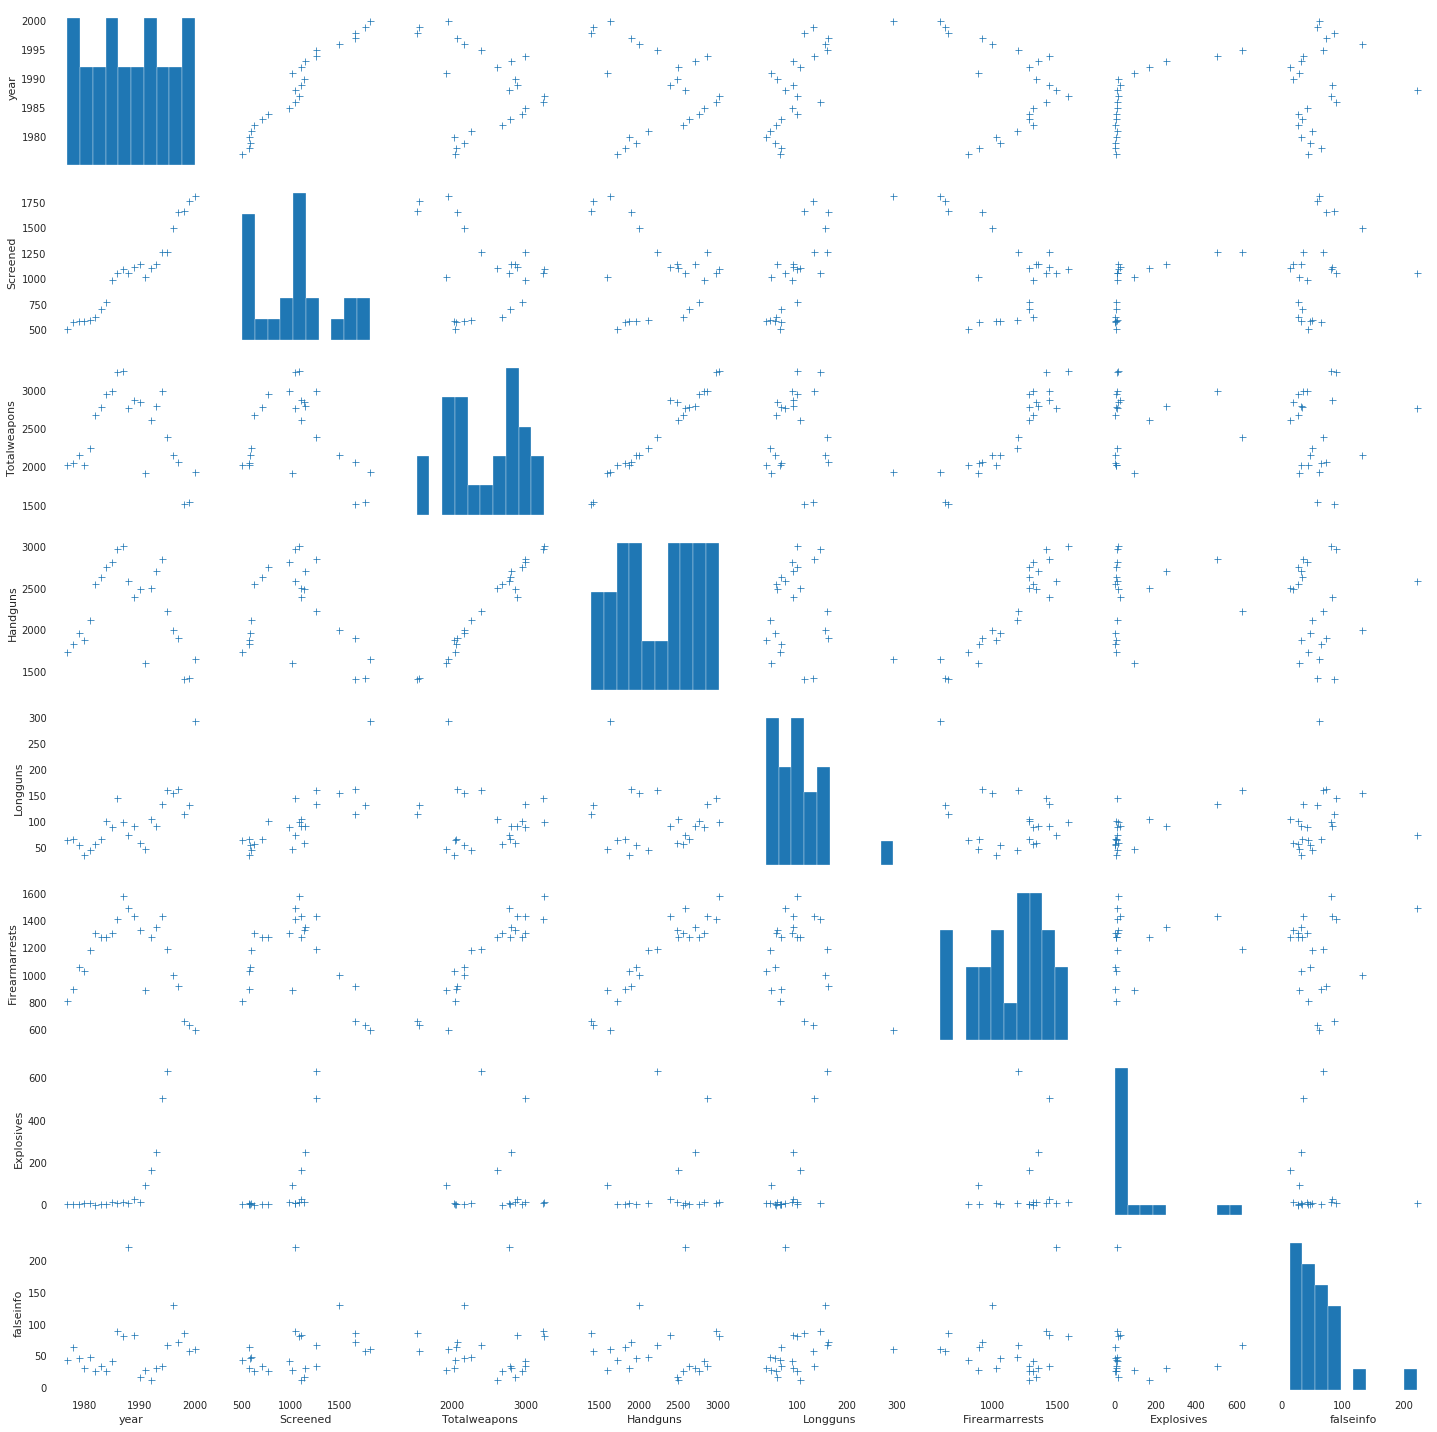

In [176]:
sb.pairplot(data, markers='+')

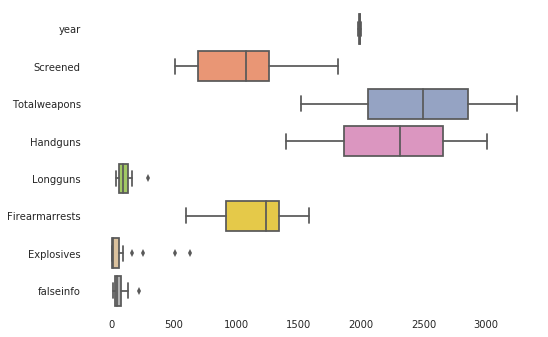

In [177]:
bp = sb.boxplot(data=data, orient="h", palette="Set2")

Как и ожидалось, у трех величин есть выбросы, поробуем их убрать и посмотреть, что будет:

In [178]:
data_cut = pd.read_csv("./var2_cut.csv", sep="\t")
data_cut

,year,Screened,Totalweapons,Handguns,Longguns,Firearmarrests,Explosives,falseinfo
0,1977,508.8,2034,1730,64.0,810,5.0,44.0
1,1978,579.7,2058,1827,67.0,896,3.0,64.0
2,1979,592.5,2161,1962,55.0,1060,3.0,47.0
3,1980,585.0,2022,1878,36.0,1031,8.0,32.0
4,1981,598.5,2255,2124,44.0,1187,11.0,49.0
5,1982,630.2,2676,2559,57.0,1314,1.0,27.0
6,1983,709.1,2784,2634,67.0,1282,4.0,34.0
7,1984,775.6,2957,2766,100.0,1285,6.0,27.0
8,1985,992.9,2987,2823,90.0,1310,12.0,42.0
9,1986,1055.3,3241,2981,146.0,1415,11.0,89.0


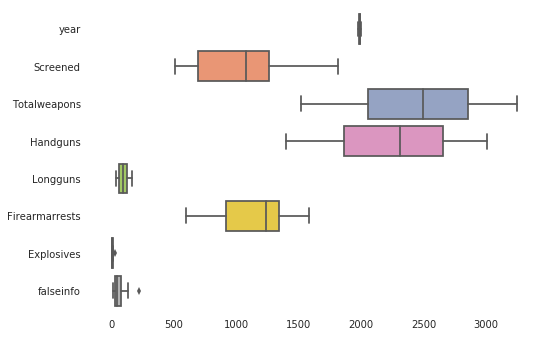

In [179]:
bp = sb.boxplot(data=data_cut, orient="h", palette="Set2")

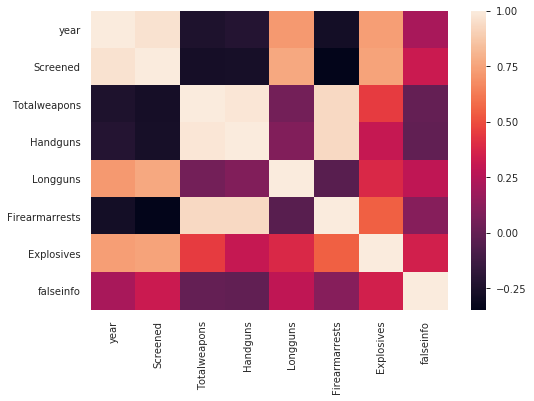

In [180]:
cor_cut = data_cut.corr()
hm = sb.heatmap(cor_cut)

Получили, что корреляция между некоторыми величинами увеличилась и тем самым отдалилась от нуля: 
1. взрывы и все остальные параметры (кроме годов)

и также корреляция увеличилась и тем самым приблизилась к нулю: 
1. аресты и длинноствольное оружие
2. длинноствольное оружие и общее число оружия
3. длинноствольное оружие и пистолеты


Посмотрим также на эксцесс новых данных без выбросов:

In [181]:
data_cut.skew()

year              0.000000
Screened          0.368542
Totalweapons     -0.169025
Handguns         -0.156061
Longguns          0.414762
Firearmarrests   -0.514323
Explosives        1.432299
falseinfo         2.263246
dtype: float64

#### Выводы2:

1. число взрывов и ложных вызово все-таки между собой связаны положительно
2. общее число оружия (а в месте с ним и короткоствольное) положительно связанно с числом арестов
3. наличие длинноствольного оружия положительно связано с числом обнаружений (параметр screened), в то время как для короткоствольного оружия это не выполняется

# Задание 2
Пусть x1, . . . , xn — равномерно распределены на [0; θ] и θn = 2x. Продемонстрируйте, что оценка является несмещенной. Исследуйте дисперсию ˆθn. Выполняется ли неравенство Рао-Крамера?

Чтобы показать, что оценка является несмещенной, будем генерировать выборку равномерного распределения на отрезке от 0 до θ с разным размером n выборки (для одного значения n генерируем несколько выборок и считаем средний парамтр), для каждого n считая собоственную оценку параметра. На графике отрисуем получиашиеся эмпирические значения оценки параметра для разного размера выборки и также отрисуем само значение оцениваемого параметра (в этом случае график будет прямой):


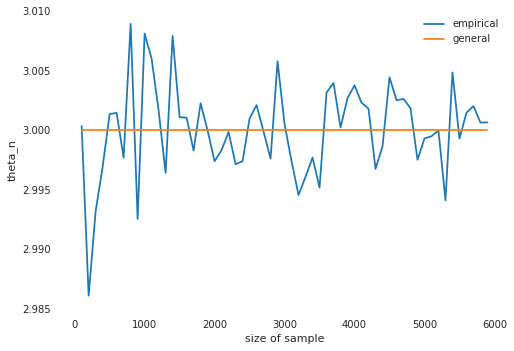

In [22]:
# функция считает оценку параметра theta по заданной выборке
def countEn(sample):
    res = 0
    for i in range(len(sample)):
        res += sample[i]

    res /= len(sample)
    return 2*res

#  функция генерирует выборку равномерного распределения разного размера, для каждого размера считает оценку параметры
#  и рисует эмпирические и генеральные значения
def view_estimate(theta=1):
    X = []
    for i in range(100, 6000, 100):
        Xn = 0
        for j in range(100):
            sample = np.random.uniform(0,theta, (1, i))[0]
            Xn += countEn(sample)
        
        Xn /= 100
        X.append(Xn)


    inds = [i for i in range(100, 6000, 100)]
    plt.plot(inds, X, label='empirical')
    plt.gca().set(xlabel='size of sample', ylabel='theta_n')
    plt.plot(inds, [theta for i in range(len(X))], label='general')
    plt.legend()
    plt.show()
 
view_estimate(3)


Видим, что эмпирические значения сосредоточены вокруг генерального значения и несильно откланяются, поэтому можно считать данную оценку несмещенной.

Для исследования дисперсии оценки построим ее график, где размер выборки будет увеличиваться, и увидим, что значение дисперсии оценки параметра θ сходится к нулю. Расчет дисперсии:
$$D\bar\theta_{n}=D2\bar{x}=\frac{4}{n^2}D\sum_{1}^{n}x_{i}=\frac{4}{n^2}nDx_{1}=\frac{4}{n}\frac{\theta^{2}}{12}=\frac{\theta^2}{3n}$$
Таким образом, у нас есть формула для левой части неравенства Рао-Крамера. Заодно найдем формулу для правой части неравенства и также отобразим ее на графике, чтобы выяснить выполняется ли неравнество Рао-Крамера:
$$E(\frac{\partial}{\partial \theta} ln(f(x)))^2=E(\frac{\partial}{\partial \theta} ln(\frac{1}{\theta}))^2=E(\frac{\partial}{\partial \theta}(-ln(\theta)))^2=E(-\frac{1}{\theta})^2=\frac{1}{\theta^2}$$
Проверяем неравенство:
$$left = \frac{\theta^2}{3n} \geq \frac{\theta^2}{n} = right$$

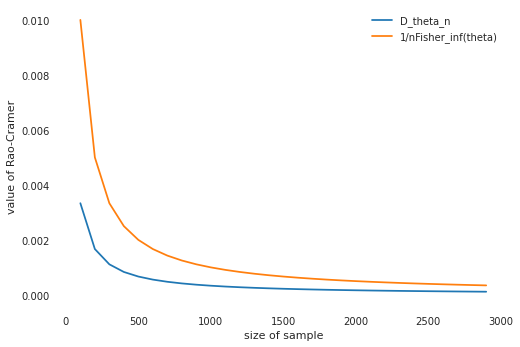

In [37]:
# функция считает дисперсию оценки параметра theta
def get_D_theta_n(theta=1, size=10):
    sample = np.random.uniform(0, theta, (1, size))[0]
    return (theta**2)/3/size

# функция рисует график левой и правой части неравенства Фишера
def view_rao_cramer(theta=1):
    left = [] 
    right = []
    for i in range(100,3000,100): # разные значения размера выборки
        Dn = 0
        for j in range(100): # для каждого n считаем 100 раз выборку, чтобы усреднить значения
            Dn += get_D_theta_n(theta=theta, size=i)
            
        Dn /= 100
        right.append(theta**2/i)
        left.append(Dn)

    inds = [i for i in range(100, 3000, 100)]
    plt.plot(inds, left, label = 'D_theta_n')
    plt.plot(inds, right, label = '1/nFisher_inf(theta)')
    plt.gca().set(xlabel='size of sample', ylabel='value of Rao-Cramer')
    plt.legend()
    plt.show()
    
view_rao_cramer()

Видим, что голубой график, соответствующий левой части неравенства Рао-Крамера, принимает меньшие значения, чем соответствующие значения правой части неравенства, поэтому нер-во Рао-Крамера в данном случае не выполняется.

# Задание 4

Продемонстрируйте, что значение выборочной функции распределения F_n(x) в точке x является несмещенной и состоятельной оценкой для теоретической функции распределения F(x) в той же точке. Исследуйте асимптотическое поведение дисперсии этой оценки.

Чтобы продемонстрировать несмещенность оценки, будем считать значение эмпирической функции распределения (э.ф.р.) в заданной точке х для разных значений размера выборки, отобразим на графике какие значения принимает эмпирическая функция в точке х и ф.р. равномерного распределения в точке х (в этом случае график - прямая).


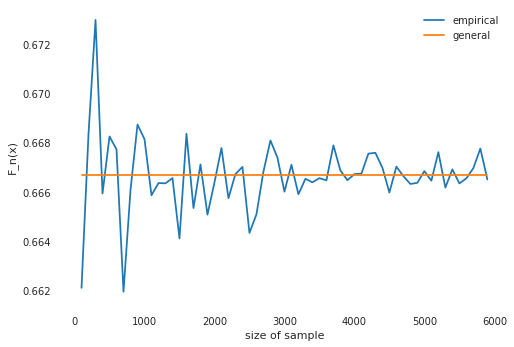

In [47]:
# функция генерирует выборку ранвомерного распределениея на отрезке [0, theta] размера size 
# и считает знаечния эмпирической функции в точке x
def Fx_n(theta=1, size=10, x=0.5):
    sample = np.random.uniform(0,theta, (1, size))[0]
    ecdf = ECDF(sample)

    return ecdf(x)

# функция строит график значений эмпирической функции в точке х для разного размера выборки
# и отображает знаечние ф.р. равномерного распределения в точке х
def view_Fx_n(theta, x):
    X = []
    for i in range(100,6000,100):
        Fn = 0
        for j in range(100):
            Fn += Fx_n(theta=theta, size=i, x=x)
        Fn /= 100
        X.append(Fn)
    inds = [i for i in range(100,6000,100)]
    plt.plot(inds, X, label='empirical')
    plt.plot(inds, [x/theta for i in range(len(X))], label='general')
    plt.gca().set(xlabel='size of sample', ylabel='F_n(x)')
    plt.legend()
    plt.show()

view_Fx_n(3, 2)

Видим, что значения э.ф.р. сосредоточены вокруг значения генеральной ф.р. и несильно от нее отклоняются, поэтому можно утверждать, что данная оценка несмещенная.

Теперь покажем состоятельность оценки. Последовательность значений э.ф.р. в точке х можно считать последовательностью случайных величин, тогда э.ф.р. в точке х будет состоятельной оценкой ф.р. в точке х, если:
$$F_{n}(x) \rightarrow F(x)$$
т.е. если $$P(|F_{n}(x)-F(x)| < \epsilon) \overset{p}{\rightarrow} 1$$ при  $$n \overset{p}{\rightarrow} \inf$$
Покажем сходимость на графике:

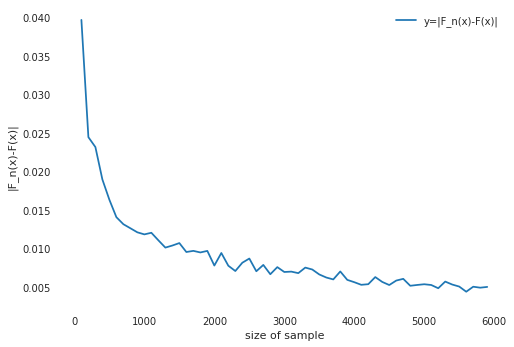

In [50]:
# функция считает модуль разницы между э.ф.р. и генеральной ф.р. в точке х для разных значений размера выборки
def check_est(theta, x):
    general = x/theta
    X = []
    for i in range(100,6000,100):
        delta_F = 0
        for j in range(100):
            delta_F += abs(general-Fx_n(theta=theta, size=i, x=x))
            
        X.append(delta_F/100)
        
    inds = [i for i in range(100, 6000, 100)]
    plt.plot(inds, X, label='y=|F_n(x)-F(x)|')
    plt.gca().set(xlabel='size of sample', ylabel='|F_n(x)-F(x)|')
    plt.legend()
    plt.show()

check_est(3, 2)

По графику видно, что разница э.ф.р. и ф.р. в точке х сходится к нулю при увеличении размера выборки, значит оценка состоятельна.

# Задание 3

Известно, что дисперсия геометрического распределения равна (1 − p)/p2, а математическое ожидание равно 1/p. Для построения доверительного интервала можно использовать следующее неравенство:

$$z_{1} < \sqrt{n}\frac{\bar{X}-\frac{1}{p}}{\sqrt{\frac{1-p}{p^2}}} < z_{2}$$

где z1 и z2 — соответствующие квантили. Выпишите явное решение неравенства относительно параметра p и с его помощью постройте доверительный интервал для параметра p.

Решим неравенстов относительно p:
$$z_{1}\sqrt{\frac{1-p}{n}} < p\bar{X} - 1 < z_{2}\sqrt{\frac{1-p}{n}}$$
$$\frac{z_{1}}{\bar{X}}\sqrt{\frac{1-p}{n}} + \frac{1}{\bar{X}} < p < \frac{z_{2}}{\bar{X}}\sqrt{\frac{1-p}{n}} + \frac{1}{\bar{X}}$$
Введем оценку параметра р, учитывая, что р - вероятность 1-го успеха в n испытаниях Бернулли:
$$\bar{p_{n}}=\frac{1}{\sum_{1}^{n}X_{i}}=\frac{1}{n\bar{X}}$$
Тогда получаем неравнество:
$$\frac{z_{1}}{\bar{X}}\sqrt{\frac{1-\frac{1}{n\bar{X}}}{n}} + \frac{1}{\bar{X}} < p < \frac{z_{2}}{\bar{X}}\sqrt{\frac{1-\frac{1}{n\bar{X}}}{n}} + \frac{1}{\bar{X}}$$
где квантили:
$$z_{1} = z_{\frac{1-\alpha}{2}}$$, $$z_{2} = z_{\frac{1+\alpha}{2}}$$

Запишем общее выражение для вероятности:
$$P(\frac{z_{1}}{\bar{X}}\sqrt{\frac{1-\frac{1}{n\bar{X}}}{n}} + \frac{1}{\bar{X}} < p < \frac{z_{2}}{\bar{X}}\sqrt{\frac{1-\frac{1}{n\bar{X}}}{n}} + \frac{1}{\bar{X}}) = 1-\alpha$$

Интервал:
$$p \in (\frac{z_{1}}{\bar{X}}\sqrt{\frac{1-\frac{1}{n\bar{X}}}{n}} + \frac{1}{\bar{X}}; \frac{z_{2}}{\bar{X}}\sqrt{\frac{1-\frac{1}{n\bar{X}}}{n}} + \frac{1}{\bar{X}})$$


Напишем функцию, которая будет по заданному p и размеру выборки генерировать геометрическое распределение и считать для него доверительный интервал. Заметим, что в преобразованиях выше была использована ЦПТ, значит результирующий интервал - асимптотический.

In [184]:
def get_interval(p=0.1, alpha=0.95, size=100):
    sample = np.random.geometric(p, size=size)
    z = scipy.stats.norm.ppf(alpha)
    x = np.mean(sample)
    a = 1 / x - z / x * math.sqrt((1 - 1 / size / x) / size)
    b = 1 / x + z / x * math.sqrt((1 - 1 / size / x) / size)
    print('interval:', a, b)

    print('prob for interval: ', scipy.stats.norm.cdf(z))
    
get_interval()

interval: 0.08686072254534796 0.12103948535485995
prob for interval:  0.95
